In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 


# CocaCola Sales Dataset

In [2]:
data=pd.read_excel('CocaCola_Sales_Rawdata.xlsx' )
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
data['Year'] = data['Quarter'].str.split('_').str[1].str[:2] 
data['Quarter'] = data['Quarter'].str.split('_').str[0]  
quarter_mapping = {"Q1": 1, "Q2": 4, "Q3": 7, "Q4": 10}
data['Quarter'] = data['Quarter'].map(quarter_mapping)

In [4]:
data['Date'] = pd.to_datetime(data['Year'] + data['Quarter'].astype(str), format='%y%m')


In [5]:
data


,Quarter,Sales,Year,Date
0,1,1734.827000,86,1986-01-01
1,4,2244.960999,86,1986-04-01
2,7,2533.804993,86,1986-07-01
3,10,2154.962997,86,1986-10-01
4,1,1547.818996,87,1987-01-01
5,4,2104.411995,87,1987-04-01
6,7,2014.362999,87,1987-07-01
7,10,1991.746998,87,1987-10-01
8,1,1869.049999,88,1988-01-01
9,4,2313.631996,88,1988-04-01


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Quarter  42 non-null     int64         
 1   Sales    42 non-null     float64       
 2   Year     42 non-null     object        
 3   Date     42 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.4+ KB


<AxesSubplot:>

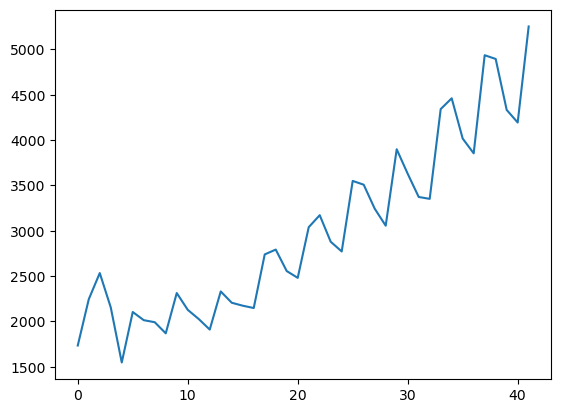

In [7]:
data['Sales'].plot()

In [8]:
data["month"] = data['Date'].dt.strftime("%b")

In [9]:
data

,Quarter,Sales,Year,Date,month
0,1,1734.827000,86,1986-01-01,Jan
1,4,2244.960999,86,1986-04-01,Apr
2,7,2533.804993,86,1986-07-01,Jul
3,10,2154.962997,86,1986-10-01,Oct
4,1,1547.818996,87,1987-01-01,Jan
5,4,2104.411995,87,1987-04-01,Apr
6,7,2014.362999,87,1987-07-01,Jul
7,10,1991.746998,87,1987-10-01,Oct
8,1,1869.049999,88,1988-01-01,Jan
9,4,2313.631996,88,1988-04-01,Apr


In [10]:
data = pd.get_dummies(data, columns=["month"],prefix=["Month"])

In [11]:
data

,Quarter,Sales,Year,Date,Month_Apr,Month_Jan,Month_Jul,Month_Oct
0,1,1734.827000,86,1986-01-01,0,1,0,0
1,4,2244.960999,86,1986-04-01,1,0,0,0
2,7,2533.804993,86,1986-07-01,0,0,1,0
3,10,2154.962997,86,1986-10-01,0,0,0,1
4,1,1547.818996,87,1987-01-01,0,1,0,0
5,4,2104.411995,87,1987-04-01,1,0,0,0
6,7,2014.362999,87,1987-07-01,0,0,1,0
7,10,1991.746998,87,1987-10-01,0,0,0,1
8,1,1869.049999,88,1988-01-01,0,1,0,0
9,4,2313.631996,88,1988-04-01,1,0,0,0


In [12]:
data["wkday"] = data.Date.dt.strftime("%A")

In [13]:
data

,Quarter,Sales,Year,Date,Month_Apr,Month_Jan,Month_Jul,Month_Oct,wkday
0,1,1734.827000,86,1986-01-01,0,1,0,0,Wednesday
1,4,2244.960999,86,1986-04-01,1,0,0,0,Tuesday
2,7,2533.804993,86,1986-07-01,0,0,1,0,Tuesday
3,10,2154.962997,86,1986-10-01,0,0,0,1,Wednesday
4,1,1547.818996,87,1987-01-01,0,1,0,0,Thursday
5,4,2104.411995,87,1987-04-01,1,0,0,0,Wednesday
6,7,2014.362999,87,1987-07-01,0,0,1,0,Wednesday
7,10,1991.746998,87,1987-10-01,0,0,0,1,Thursday
8,1,1869.049999,88,1988-01-01,0,1,0,0,Friday
9,4,2313.631996,88,1988-04-01,1,0,0,0,Friday


In [14]:
data = pd.get_dummies(data, columns=["wkday"])
data

,Quarter,Sales,Year,Date,Month_Apr,Month_Jan,Month_Jul,Month_Oct,wkday_Friday,wkday_Monday,wkday_Saturday,wkday_Sunday,wkday_Thursday,wkday_Tuesday,wkday_Wednesday
0,1,1734.827000,86,1986-01-01,0,1,0,0,0,0,0,0,0,0,1
1,4,2244.960999,86,1986-04-01,1,0,0,0,0,0,0,0,0,1,0
2,7,2533.804993,86,1986-07-01,0,0,1,0,0,0,0,0,0,1,0
3,10,2154.962997,86,1986-10-01,0,0,0,1,0,0,0,0,0,0,1
4,1,1547.818996,87,1987-01-01,0,1,0,0,0,0,0,0,1,0,0
5,4,2104.411995,87,1987-04-01,1,0,0,0,0,0,0,0,0,0,1
6,7,2014.362999,87,1987-07-01,0,0,1,0,0,0,0,0,0,0,1
7,10,1991.746998,87,1987-10-01,0,0,0,1,0,0,0,0,1,0,0
8,1,1869.049999,88,1988-01-01,0,1,0,0,1,0,0,0,0,0,0
9,4,2313.631996,88,1988-04-01,1,0,0,0,1,0,0,0,0,0,0


In [15]:
data['Logsale'] = np.log(data['Sales'])


In [16]:
data['Year'] = data['Year'].astype(int)
data['Squareyear'] = data['Year'] ** 2
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Quarter          42 non-null     int64         
 1   Sales            42 non-null     float64       
 2   Year             42 non-null     int32         
 3   Date             42 non-null     datetime64[ns]
 4   Month_Apr        42 non-null     uint8         
 5   Month_Jan        42 non-null     uint8         
 6   Month_Jul        42 non-null     uint8         
 7   Month_Oct        42 non-null     uint8         
 8   wkday_Friday     42 non-null     uint8         
 9   wkday_Monday     42 non-null     uint8         
 10  wkday_Saturday   42 non-null     uint8         
 11  wkday_Sunday     42 non-null     uint8         
 12  wkday_Thursday   42 non-null     uint8         
 13  wkday_Tuesday    42 non-null     uint8         
 14  wkday_Wednesday  42 non-null     uint8      

In [17]:
data.shape

(42, 17)

In [18]:
Train = data.head(35)
Test = data.tail(7)

In [19]:
Train

,Quarter,Sales,Year,Date,Month_Apr,Month_Jan,Month_Jul,Month_Oct,wkday_Friday,wkday_Monday,wkday_Saturday,wkday_Sunday,wkday_Thursday,wkday_Tuesday,wkday_Wednesday,Logsale,Squareyear
0,1,1734.827000,86,1986-01-01,0,1,0,0,0,0,0,0,0,0,1,7.458663,7396
1,4,2244.960999,86,1986-04-01,1,0,0,0,0,0,0,0,0,1,0,7.716443,7396
2,7,2533.804993,86,1986-07-01,0,0,1,0,0,0,0,0,0,1,0,7.837477,7396
3,10,2154.962997,86,1986-10-01,0,0,0,1,0,0,0,0,0,0,1,7.675529,7396
4,1,1547.818996,87,1987-01-01,0,1,0,0,0,0,0,0,1,0,0,7.344602,7569
5,4,2104.411995,87,1987-04-01,1,0,0,0,0,0,0,0,0,0,1,7.651791,7569
6,7,2014.362999,87,1987-07-01,0,0,1,0,0,0,0,0,0,0,1,7.608058,7569
7,10,1991.746998,87,1987-10-01,0,0,0,1,0,0,0,0,1,0,0,7.596767,7569
8,1,1869.049999,88,1988-01-01,0,1,0,0,1,0,0,0,0,0,0,7.533186,7744
9,4,2313.631996,88,1988-04-01,1,0,0,0,1,0,0,0,0,0,0,7.746574,7744


In [20]:
Test

,Quarter,Sales,Year,Date,Month_Apr,Month_Jan,Month_Jul,Month_Oct,wkday_Friday,wkday_Monday,wkday_Saturday,wkday_Sunday,wkday_Thursday,wkday_Tuesday,wkday_Wednesday,Logsale,Squareyear
35,10,4017.0,94,1994-10-01,0,0,0,1,0,0,1,0,0,0,0,8.298291,8836
36,1,3854.0,95,1995-01-01,0,1,0,0,0,0,0,1,0,0,0,8.256867,9025
37,4,4936.0,95,1995-04-01,1,0,0,0,0,0,1,0,0,0,0,8.504311,9025
38,7,4895.0,95,1995-07-01,0,0,1,0,0,0,1,0,0,0,0,8.495970,9025
39,10,4333.0,95,1995-10-01,0,0,0,1,0,0,0,1,0,0,0,8.374015,9025
40,1,4194.0,96,1996-01-01,0,1,0,0,0,1,0,0,0,0,0,8.341410,9216
41,4,5253.0,96,1996-04-01,1,0,0,0,0,1,0,0,0,0,0,8.566555,9216


In [21]:
#Linear Model
linear_model = smf.ols('Sales ~ Year', data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['Year'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

660.0171150107248

In [22]:
#Exponential
Exp = smf.ols('Logsale ~ Year',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['Year'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

537.7494275399797

In [23]:
#Quadratic 
Quad = smf.ols('Sales ~ Year + Squareyear',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["Year","Squareyear"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

549.8064265693761

In [24]:
#Additive seasonality 
add_sea = smf.ols('Sales~ +Month_Apr+Month_Jan+Month_Jul+Month_Oct',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Month_Apr','Month_Jan','Month_Jul','Month_Oct']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1861.8704164251744

In [25]:
##Multiplicative Seasonality
Mul_sea = smf.ols('Logsale~Month_Apr+Month_Jan+Month_Jul+Month_Oct',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1938.9332351966127

In [26]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Sales ~ Year + Squareyear + Month_Apr+Month_Jan+Month_Jul+Month_Oct',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Month_Apr','Month_Jan','Month_Jul','Month_Oct','Year','Squareyear']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

336.7595607038049

In [27]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('Logsale~Year+ Month_Apr+Month_Jan+Month_Jul+Month_Oct',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

339.1874666994243

In [28]:
df = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_Mult_sea","rmse_add_sea_quad","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_Mult_sea,rmse_add_sea_quad,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(df)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
5,rmse_add_sea_quad,336.759561
6,rmse_Mult_add_sea,339.187467
1,rmse_Exp,537.749428
2,rmse_Quad,549.806427
0,rmse_linear,660.017115
3,rmse_add_sea,1861.870416
4,rmse_Mult_sea,1938.933235


# Airlines Dataset

In [29]:
df=pd.read_excel('Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [30]:
df.rename(columns={'Month':'Date'},inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


<AxesSubplot:>

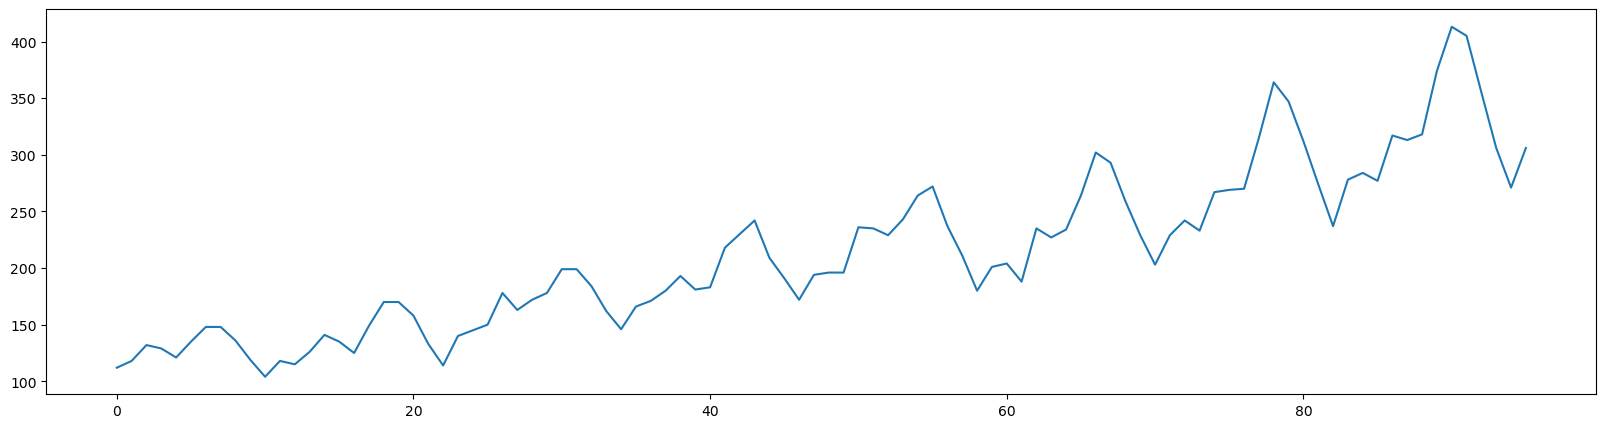

In [32]:
plt.figure(figsize = (20,5))
df['Passengers'].plot()

In [33]:
df["Month"] = df['Date'].dt.strftime("%b")
df["Year"] = df['Date'].dt.strftime("%Y")
df["Wkday"] = df.Date.dt.strftime("%A")

In [34]:
df

,Date,Passengers,Month,Year,Wkday
0,1995-01-01,112,Jan,1995,Sunday
1,1995-02-01,118,Feb,1995,Wednesday
2,1995-03-01,132,Mar,1995,Wednesday
3,1995-04-01,129,Apr,1995,Saturday
4,1995-05-01,121,May,1995,Monday
...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,Thursday
92,2002-09-01,355,Sep,2002,Sunday
93,2002-10-01,306,Oct,2002,Tuesday
94,2002-11-01,271,Nov,2002,Friday


In [35]:
from sklearn.preprocessing import LabelEncoder

LB=LabelEncoder()

df['Wkday']=LB.fit_transform(df.Wkday)
df = pd.get_dummies(df, columns=["Month"])

df

,Date,Passengers,Year,Wkday,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,1995-01-01,112,1995,3,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,6,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,6,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,2,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,4,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002,3,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002,5,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
df['Logpass'] = np.log(df['Passengers'])
df['Year'] = df['Year'].astype(int)
df['Squareyear'] = df['Year'] ** 2
df


,Date,Passengers,Year,Wkday,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Logpass,Squareyear
0,1995-01-01,112,1995,3,0,0,0,0,1,0,0,0,0,0,0,0,4.718499,3980025
1,1995-02-01,118,1995,6,0,0,0,1,0,0,0,0,0,0,0,0,4.770685,3980025
2,1995-03-01,132,1995,6,0,0,0,0,0,0,0,1,0,0,0,0,4.882802,3980025
3,1995-04-01,129,1995,2,1,0,0,0,0,0,0,0,0,0,0,0,4.859812,3980025
4,1995-05-01,121,1995,1,0,0,0,0,0,0,0,0,1,0,0,0,4.795791,3980025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,4,0,1,0,0,0,0,0,0,0,0,0,0,6.003887,4008004
92,2002-09-01,355,2002,3,0,0,0,0,0,0,0,0,0,0,0,1,5.872118,4008004
93,2002-10-01,306,2002,5,0,0,0,0,0,0,0,0,0,0,1,0,5.723585,4008004
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,0,1,0,0,5.602119,4008004


In [37]:
df.shape

(96, 18)

In [38]:
Train = df.head(86)
Test = df.tail(10)

In [39]:
#Linear Model

linear_model = smf.ols('Passengers ~ Year', data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['Year'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

59.094465964692915

In [40]:
#Exponential

Exp = smf.ols('Logpass ~ Year',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['Year'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

48.452424830684315

In [41]:
#Quadratic

Quad = smf.ols('Passengers ~ Year + Squareyear',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["Year","Squareyear"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

56.28728600033871

In [42]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov+Month_Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Month_Jan','Month_Feb','Month_Mar','Month_Apr','Month_May','Month_Jun','Month_Jul','Month_Aug','Month_Sep','Month_Oct','Month_Nov','Month_Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

136.79010436819325

In [43]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers ~ Year + Squareyear +Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov+Month_Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Month_Jan','Month_Feb','Month_Mar','Month_Apr','Month_May','Month_Jun','Month_Jul','Month_Aug','Month_Sep','Month_Oct','Month_Nov','Month_Dec','Year','Squareyear']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

30.745974696864742

In [44]:
##Multiplicative Seasonality

Mul_sea = smf.ols('Logpass~Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov+Month_Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

144.38493549461418

In [45]:
value = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea])}
table_rmse=pd.DataFrame(value)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,30.745975
1,rmse_Exp,48.452425
2,rmse_Quad,56.287286
0,rmse_linear,59.094466
3,rmse_add_sea,136.790104
5,rmse_Mult_sea,144.384935
